In [33]:
import pandas as pd

# Load the dataset
movies_df = pd.read_csv('movies.csv')

# Display the first few rows of the dataset to get an overview
movies_df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124


In [34]:
# Check for missing values in each column
missing_values = movies_df.isnull().sum()

missing_values

budget                  0
genres                  0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
dtype: int64

In [35]:
# Drop rows with missing 'release_date'
movies_df.dropna(subset=['release_date'], inplace=True)

# Drop rows with missing 'runtime'
movies_df.dropna(subset=['runtime'], inplace=True)


# Verify if there are any missing values left
remaining_missing_values = movies_df.isnull().sum()

remaining_missing_values

budget                  0
genres                  0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [36]:
# Convert 'release_date' to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_date']

0      2009-12-10
1      2007-05-19
2      2015-10-26
3      2012-07-16
4      2012-03-07
          ...    
4798   1992-09-04
4799   2011-12-26
4800   2013-10-13
4801   2012-05-03
4802   2005-08-05
Name: release_date, Length: 4800, dtype: datetime64[ns]

In [37]:
import json

# Convert 'release_date' to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Parse JSON columns
def parse_json(column):
    return movies_df[column].apply(lambda x: [i['name'] for i in json.loads(x.replace("'", "\""))])

json_columns = ['genres', 'keywords', 'production_companies', 'production_countries']
for col in json_columns:
    movies_df[col] = parse_json(col)

# Display the first few rows after processing
movies_df.head()

JSONDecodeError: Expecting ',' delimiter: line 1 column 191 (char 190)

In [38]:
# Identify problematic records for JSON parsing
def identify_problematic_records(column):
    problematic_indices = []
    for idx, value in enumerate(movies_df[column]):
        try:
            json.loads(value.replace("'", "\""))
        except:
            problematic_indices.append(idx)
    return problematic_indices

problematic_records = {}
for col in json_columns:
    problematic_indices = identify_problematic_records(col)
    if problematic_indices:
        problematic_records[col] = problematic_indices

problematic_records

{'genres': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
 

In [39]:
# Convert problematic JSON columns to string format
for col in problematic_records:
    movies_df[col] = movies_df[col].astype(str)

# Display the first few rows after conversion
movies_df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124


In [40]:
# 1. Process 'genres' column to keep only the words describing the movie
movies_df['genres'] = movies_df['genres'].str.replace("[\[\]'\" ]", "").str.split(",")

# 2. Drop 'keywords' column
movies_df.drop(columns='keywords', inplace=True)

# 3. Process 'production_companies' column to keep only the company names
movies_df['production_companies'] = movies_df['production_companies'].str.findall(r'"name": "([^"]+)"').apply(", ".join)

# 4. Process 'production_countries' column to keep only the country names
movies_df['production_countries'] = movies_df['production_countries'].str.findall(r'"name": "([^"]+)"').apply(", ".join)

# Display the first few rows after processing
movies_df.head()



/var/folders/j2/d6gfnc_j1w92nhthf02vfpy00000gn/T/ipykernel_81778/2835414751.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['genres'] = movies_df['genres'].str.replace("[\[\]'\" ]", "").str.split(",")


,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",en,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",en,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, ScienceFiction]",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124


In [41]:
# Convert 'genres' column back to string format without brackets and commas
movies_df['genres'] = movies_df['genres'].apply(", ".join)

# Display the first few rows to verify
movies_df.head()[['genres']]

,genres
0,"Action, Adventure, Fantasy, ScienceFiction"
1,"Adventure, Fantasy, Action"
2,"Action, Adventure, Crime"
3,"Action, Crime, Drama, Thriller"
4,"Action, Adventure, ScienceFiction"


In [42]:
movies_df.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, ScienceFiction",en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"Adventure, Fantasy, Action",en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action, Adventure, Crime",en,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"Action, Crime, Drama, Thriller",en,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"Action, Adventure, ScienceFiction",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124


In [32]:
movies_df.to_csv('movies_new.csv', index=False)

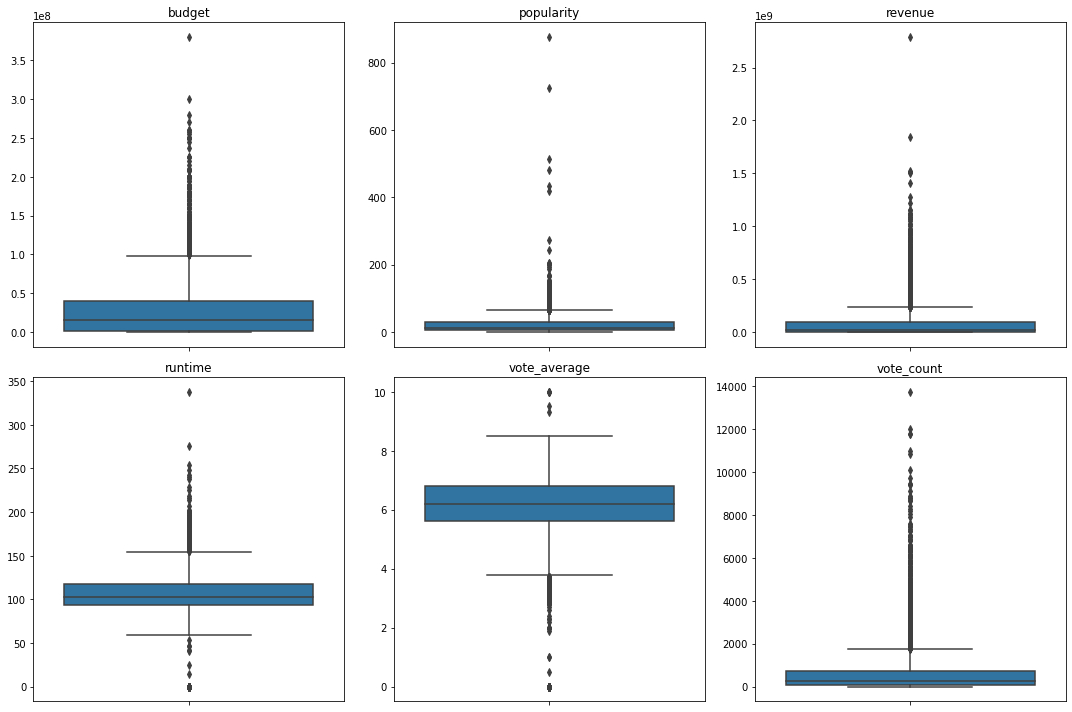

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

# Plot boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=movies_df[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [24]:
# IQR Method for Outlier Detection

def detect_outliers_iqr(df, column):
    """
    Detect outliers using IQR method.
    Returns indices of outlier rows.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index

# Detecting outliers for the specified columns
columns_to_check = ['budget', 'popularity', 'revenue', 'runtime']
outliers_iqr = {}

for col in columns_to_check:
    outliers_iqr[col] = detect_outliers_iqr(movies_df, col)

outliers_iqr


{'budget': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
              378,  385,  468,  491,  498,  565,  566,  692, 1062, 1652],
            dtype='int64', length=321),
 'popularity': Int64Index([   0,    1,    2,    3,    5,    7,    8,    9,   11,   12,
             ...
             3454, 3719, 3865, 3986, 4074, 4259, 4300, 4302, 4333, 4579],
            dtype='int64', length=274),
 'revenue': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             3202, 3236, 3337, 3418, 3593, 3696, 3813, 3824, 4441, 4496],
            dtype='int64', length=471),
 'runtime': Int64Index([   0,    1,    3,   22,   24,   25,   36,   59,   95,   98,
             ...
             4592, 4611, 4620, 4633, 4657, 4658, 4662, 4709, 4729, 4756],
            dtype='int64', length=181)}

In [25]:
def cap_floor_iqr(df, column):
    """
    Cap and floor outliers using IQR method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)

# Applying capping/flooring for the specified columns
for col in columns_to_check:
    cap_floor_iqr(movies_df, col)

movies_df[columns_to_check].describe()
from scipy.stats import zscore

# Z-Score Method for Outlier Detection and Capping/Flooring
def cap_floor_zscore(df, column, threshold=3):
    """
    Cap and floor outliers using Z-Score method.
    """
    z_scores = zscore(df[column].dropna())
    upper_bool = z_scores > threshold
    lower_bool = z_scores < -threshold

    upper_value = df[column].dropna()[~upper_bool].max()
    lower_value = df[column].dropna()[~lower_bool].min()
    
    df[column] = df[column].apply(lambda x: upper_value if x > upper_value else x)
    df[column] = df[column].apply(lambda x: lower_value if x < lower_value else x)

# Applying Z-Score capping/flooring for the specified columns
movies_df_zscore = movies_df.copy()
for col in columns_to_check:
    cap_floor_zscore(movies_df_zscore, col)

movies_df_zscore[columns_to_check].describe()


,budget,popularity,revenue,runtime
count,4.800000e+03,4800.000000,4.800000e+03,4800.000000
mean,2.577784e+07,19.152298,5.869119e+07,106.629375
std,3.010668e+07,18.352859,7.782789e+07,18.370703
min,0.000000e+00,0.000372,0.000000e+00,58.000000
25%,8.000000e+05,4.682212,0.000000e+00,94.000000
50%,1.500000e+07,12.928897,1.918199e+07,103.000000
75%,4.000000e+07,28.350628,9.293886e+07,118.000000
max,9.880000e+07,63.853253,2.323472e+08,154.000000


In [26]:
# Percentile Method for Outlier Detection and Capping/Flooring
def cap_floor_percentile(df, column, lower_percentile=0.01, upper_percentile=0.99):
    """
    Cap and floor outliers using Percentile method.
    """
    upper_value = df[column].quantile(upper_percentile)
    lower_value = df[column].quantile(lower_percentile)
    
    df[column] = df[column].apply(lambda x: upper_value if x > upper_value else x)
    df[column] = df[column].apply(lambda x: lower_value if x < lower_value else x)

# Applying Percentile capping/flooring for the specified columns
movies_df_percentile = movies_df.copy()
for col in columns_to_check:
    cap_floor_percentile(movies_df_percentile, col)

movies_df_percentile[columns_to_check].describe()

,budget,popularity,revenue,runtime
count,4.800000e+03,4800.000000,4.800000e+03,4800.000000
mean,2.577784e+07,19.152465,5.869119e+07,106.720833
std,3.010668e+07,18.352685,7.782789e+07,18.152487
min,0.000000e+00,0.029747,0.000000e+00,68.000000
25%,8.000000e+05,4.682212,0.000000e+00,94.000000
50%,1.500000e+07,12.928897,1.918199e+07,103.000000
75%,4.000000e+07,28.350628,9.293886e+07,118.000000
max,9.880000e+07,63.853253,2.323472e+08,154.000000


In [27]:
# Descriptive statistics for numerical columns after removing rows with zeros
numerical_stats_after_removal = movies_df[numerical_columns].describe()

numerical_stats_after_removal

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.577784e+07,19.152298,5.869119e+07,106.629375,6.094458,690.646875
std,3.010668e+07,18.352859,7.782789e+07,18.370703,1.188366,1234.852449
min,0.000000e+00,0.000372,0.000000e+00,58.000000,0.000000,0.000000
25%,8.000000e+05,4.682212,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.928897,1.918199e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,28.350628,9.293886e+07,118.000000,6.800000,737.250000
max,9.880000e+07,63.853253,2.323472e+08,154.000000,10.000000,13752.000000


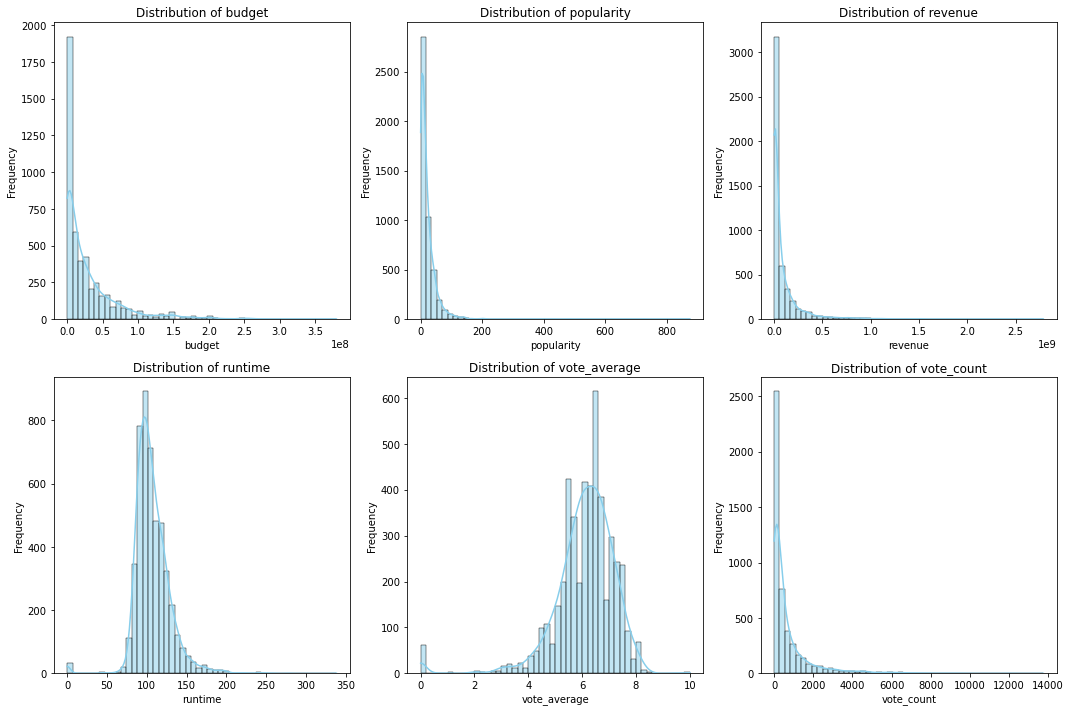

In [44]:
# Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(movies_df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

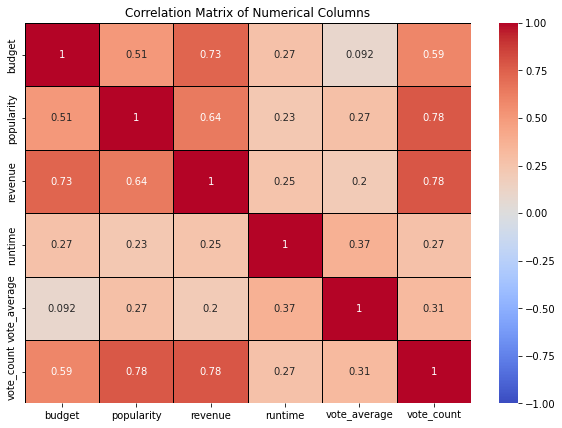

In [45]:
# Compute the correlation matrix
correlation_matrix = movies_df[numerical_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

budget 和 revenue 之间有一个较强的正相关关系，这意味着预算高的电影往往票房收入也高。
vote_count 和 revenue 之间也有一个较强的正相关关系，表明评分次数多的电影往往票房收入也高。
popularity 和 vote_count 之间有一个很强的正相关关系，说明受欢迎的电影通常也有更多的评分。

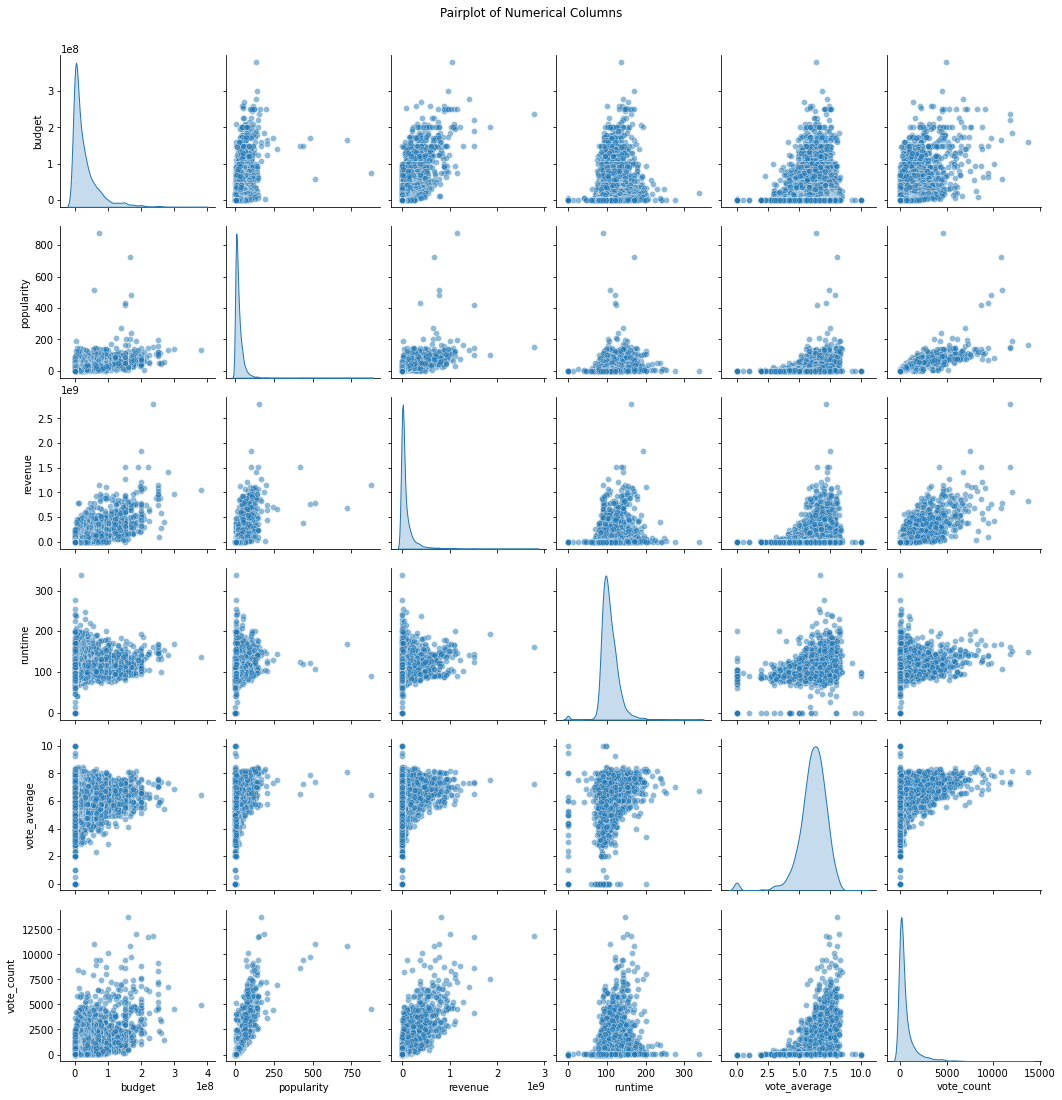

In [46]:
# Plot the pairplot for numerical columns to see relationships between them
sns.pairplot(movies_df[numerical_columns], diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Numerical Columns", y=1.02)
plt.show()

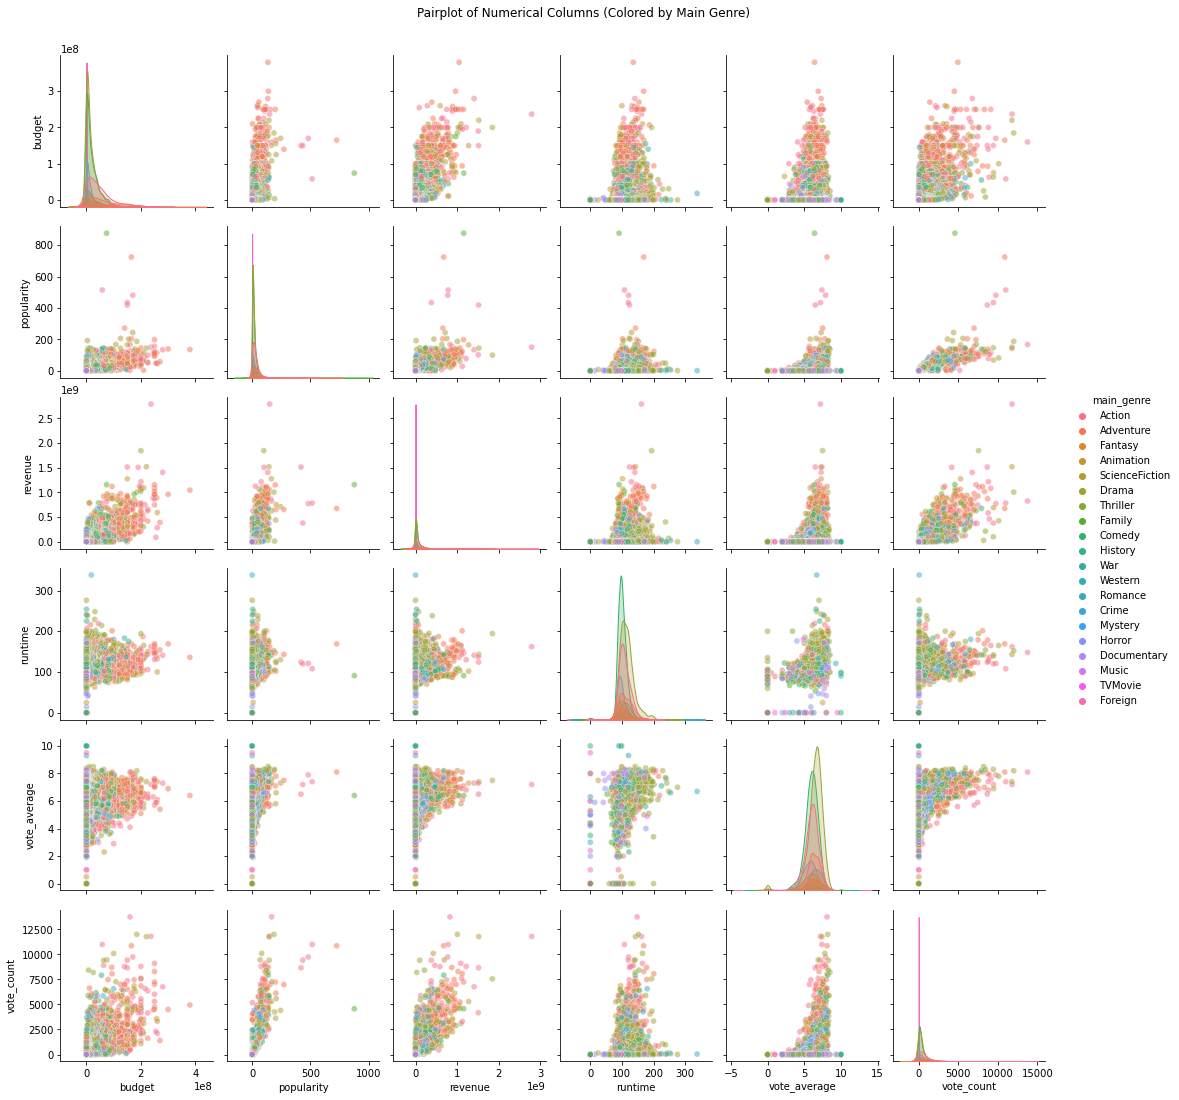

In [47]:
# Find the most common genre for each movie
movies_df['main_genre'] = movies_df['genres'].str.split(", ").apply(lambda x: x[0] if isinstance(x, list) and x else None)

# Plot the pairplot with colors representing the main genre
sns.pairplot(movies_df[numerical_columns + ['main_genre']], hue='main_genre', diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Numerical Columns (Colored by Main Genre)", y=1.02)
plt.show()

budget 和 revenue 之间有一个明显的正相关关系。
vote_count 和 revenue 之间也有一个明显的正相关关系。
popularity 和 vote_count 之间存在正相关关系。

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Original Dataset
original_dataset = movies_df.copy()

# 2. PCA Transformed Dataset
# First, standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(movies_df[numerical_columns])

# Perform PCA
pca_90 = PCA(n_components=0.9)
pca_transformed_data_90 = pca_90.fit_transform(scaled_data)
pca_dataset_90 = pd.DataFrame(pca_transformed_data_90)

# 3. Dataset with selected features based on common sense
selected_features_dataset = movies_df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]

original_dataset.shape, pca_dataset_90.shape, selected_features_dataset.shape


((4800, 13), (4800, 4), (4800, 5))